# ガンマ分布の作図

- 執筆期間：2022/01/28 - 2022/01/28

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-28 13:33


# ガンマ分布の作図

　ガンマ分布(Gamma Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import gamma, norm, poisson # ガンマ分布, 1次元ガウス分布, ポアソン分布
import scipy.special as sp # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。不要であれば省略してください。  
<br>

## 定義式の確認

　まずは、ガンマ分布の定義式を確認します。  
<br>

　ガンマ分布は、次の式で定義されます。

$$
\mathrm{Gam}(\lambda | a, b)
    = \frac{b^a}{\Gamma(a)}
      \lambda^{a-1}
      e^{-b\lambda}
$$

　ここで、$a$は形状に関するパラメータ、$b$は尺度に関するパラメータです。  
　確率変数の値$\lambda$は、$\lambda > 0$となります。パラメータ$a, b$は、$a > 0, b > 0$を満たす必要があります。  

　この式の対数をとると、次の式になります。

$$
\log \mathrm{Gam}(\lambda | a, b)
    = a \log b - \log \Gamma(a) + (a - 1) \log \lambda - b \lambda
$$

　ガンマ分布の平均と・分散・最頻値は、それぞれ次の式で計算できます。

$$
\begin{aligned}
\mathbb{E}[\lambda]
   &= \frac{a}{b}
\\
\mathbb{V}[\lambda]
   &= \frac{a}{b^2}
\\
\mathrm{mode}[\lambda]
   &= \frac{a - 1}{b}
\end{aligned}
$$

<br>

　ガンマ分布は、0以上の値$\lambda > 0$を生成することから、1次元ガウス分布の精度パラメータやポアソン分布のパラメータの事前分布として利用されます。  
<br>

## 確率の計算

　ガンマ分布に従う確率を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# パラメータを指定
a = 2.0
b = 2.0

# 確率変数の値を指定
lmd = 2.0

　ガンマ分布のパラメータ$a > 0, b > 0$、確率変数がとり得る値$\lambda > 0$を指定します。設定した値に従う確率密度を計算します。`lambda`は予約語のため変数名として使えないので`lmd`とします。  

　まずは、定義式から確率密度を計算します。

In [4]:
# 定義式により確率密度を計算
C = b**a / sp.gamma(a)
dens = C * lmd**(a - 1.0) * np.exp(-b * lmd)
print(dens)

0.14652511110987343


　ガンマ分布の定義式

$$
\begin{aligned}
C_{\mathrm{Gam}}
   &= \frac{b^a}{\Gamma(a)}
\\
\mathrm{Gam}(\lambda | a, b)
   &= C_{\mathrm{Gam}}
      \lambda^{a-1}
      \exp(- b \lambda)
\end{aligned}
$$

で計算します。$C_{\mathrm{Gam}}$は、ガンマ分布の正規化係数です。  
　$\Gamma(x)$はガンマ関数で、`SciPy`ライブラリの`special`モジュールの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率密度を計算
log_C = a * np.log(b) - sp.loggamma(a)
log_dens = log_C + (a - 1.0) * np.log(lmd) - b * lmd
dens = np.exp(log_dens)
print(dens, log_dens)

0.14652511110987343 -1.9205584583201643


　対数をとった定義式

$$
\begin{aligned}
\log C_{\mathrm{Gam}}
   &= a \log b - \log \Gamma(a)
\\
\log \mathrm{Gam}(\lambda | a, b)
   &= \log C_{\mathrm{Gam}}
      + (a - 1) \log \lambda
      - b \lambda
\end{aligned}
$$

を計算します。計算結果の指数をとると確率が得られます。

$$
\mathrm{Gam}(\lambda | a, b)
    = \exp \Bigr(
          \log \mathrm{Gam}(\lambda | a, b)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　ポアソン分布のモジュール`gamma`の確率密度メソッド`pdf()`を使って計算します。

In [6]:
# ガンマ分布の関数により確率密度を計算
dens = gamma.pdf(x=lmd, a=a, scale=1.0 / b)
print(dens)

0.14652511110987346


　変数の引数`x`に`lmd`、形状の引数`a`に`a`、尺度の引数`scale`に$b$の逆数`1.0 / b`を指定します。  

　`logpdf()`だと対数をとった確率密度を計算します。

In [7]:
# ガンマ分布の対数をとった関数により確率密度を計算
log_dens = gamma.logpdf(x=lmd, a=a, scale=1.0 / b)
dens = np.exp(log_dens)
print(dens, log_dens)

0.14652511110987348 -1.9205584583201638


　計算結果の指数をとると確率密度が得られます。  
<br>

## 統計量の計算

　ガンマ分布の平均と分散を計算します。  
<br>

　平均を計算します。

In [8]:
# 計算式により平均を計算
E_lambda = a / b
print(E_lambda)

1.0


　ガンマ分布の平均は、次の式で計算できます。

$$
\mathbb{E}[x]
    = \frac{a}{b}
$$

　分散を計算します。

In [9]:
# 計算式により分散を計算
V_lambda = a / b**2
print(V_lambda)

0.5


　ガンマ分布の分散は、次の式で計算できます。

$$
\mathbb{V}[x]
    = \frac{a}{b^2}
$$

　最頻値を計算します。

In [10]:
# 計算式により最頻値を計算
mode_lambda = (a - 1.0) / b
print(mode_lambda)

0.5


　ガンマ分布の最頻値は、次の式で計算できます。

$$
\mathrm{mode}[\lambda]
    = \frac{a - 1}{b}
$$

　ガンマ分布のモジュールの平均メソッド`mean()`でも平均を計算できます。

In [11]:
# ガンマ分布の関数により平均を計算
E_lambda = gamma.mean(a=a, scale=1.0 / b)
print(E_lambda)

1.0


　確率メソッドと同様に引数を指定します。  

　分散メソッド`var()`で分散を計算します。

In [12]:
# ガンマ分布の関数により分散を計算
V_lambda = gamma.var(a=a, scale=1.0 / b)
print(V_lambda)

0.5


　こちらも同様に引数を指定します。  
<br>

## 分布の可視化

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用してガンマ分布のグラフを作成します。  
<br>

　ガンマ分布の確率変数がとり得る値$\lambda$ごとの確率密度を計算します。

In [13]:
# パラメータを指定
a = 2.0
b = 2.0

# 作図用のlambdaの点を作成
lambda_vals = np.linspace(start=0.0, stop=5.0, num=250)
print(lambda_vals[:5])

# ガンマ分布を計算
density = gamma.pdf(x=lambda_vals, a=a, scale = 1.0 / b)
print(density[:5])

[0.         0.02008032 0.04016064 0.06024096 0.08032129]
[0.         0.07715945 0.14824415 0.2136128  0.27360527]


　$\lambda$がとり得る値を作成して`lambda_vals`とします。この例では、`0`から`5`を範囲とします。  
　`lambda_vals`の各要素に対応する確率密度を求めます。  

　$\lambda > 0$なので、`lambda`が`0`の要素は`density`が`0`になっています。  

　ガンマ分布のグラフを作成します。

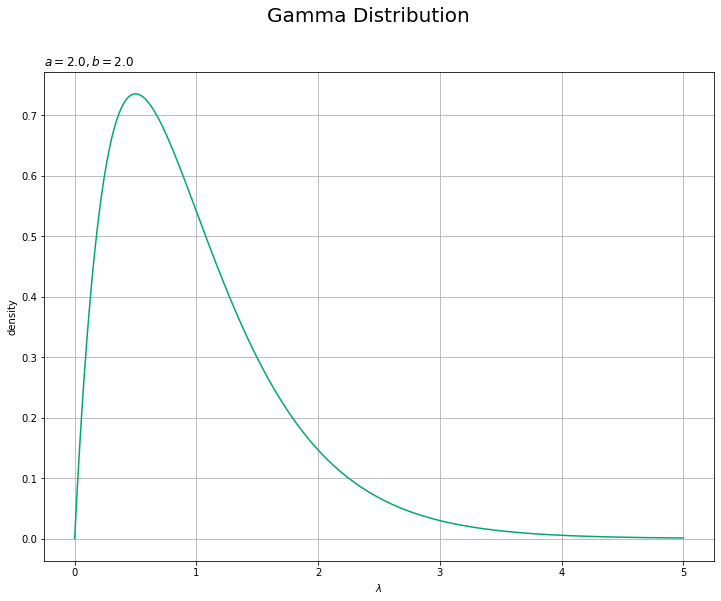

In [14]:
# ガンマ分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(lambda_vals, density, color='#00A968') # 折れ線グラフ
plt.xlabel('$\lambda$') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.show() # 描画

<br>

　この分布に平均と最頻値、標準偏差の情報を重ねて表示します。

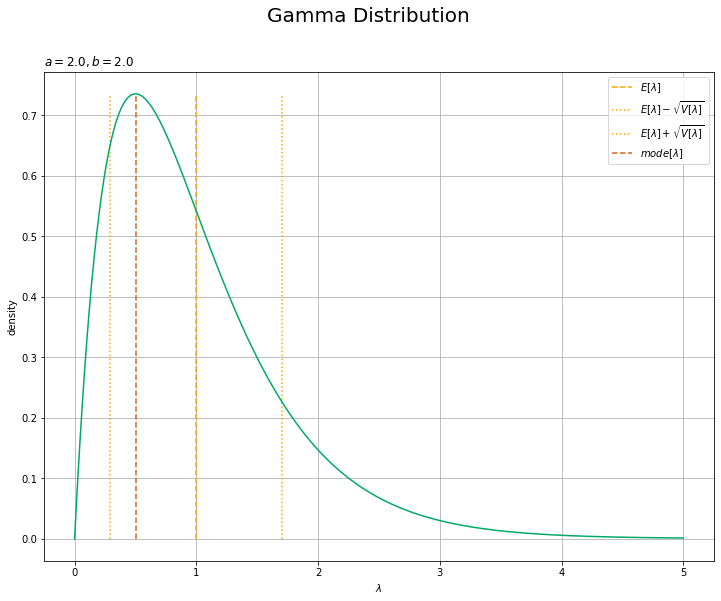

In [15]:
# 統計量を計算
E_lmd = a / b
s_lmd = np.sqrt(a / b**2)
mode_lmd = (a - 1.0) / b

# 統計量を重ねたガンマ分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(lambda_vals, density, color='#00A968') # 分布
plt.vlines(x=E_lmd, ymin=0.0, ymax=np.max(density), color='orange', linestyle='--', label='$E[\lambda]$') # 平均
plt.vlines(x=E_lmd - s_lmd, ymin=0.0, ymax=np.max(density), color='orange', linestyle=':', label='$E[\lambda] - \\sqrt{V[\lambda]}$') # 平均 - 標準偏差
plt.vlines(x=E_lmd + s_lmd, ymin=0.0, ymax=np.max(density), color='orange', linestyle=':', label='$E[\lambda] + \\sqrt{V[\lambda]}$') # 平均 + 標準偏差
plt.vlines(x=mode_lmd, ymin=0.0, ymax=np.max(density), color='chocolate', linestyle='--', label='$mode[\lambda]$') # 最頻値
plt.xlabel('$\lambda$') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　ガンマ分布は対称な形ではないので、平均(オレンジ色の破線)と最頻値(茶色の破線)が一致しないのを確認できます。  

　ガンマ分布のグラフを描画できました。  
<br>

## パラメータと分布の形状の関係

　パラメータが及ぼす分布への影響をアニメーション(gif画像)で可視化します。  
<br>

　パラメータ$a, b$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


100


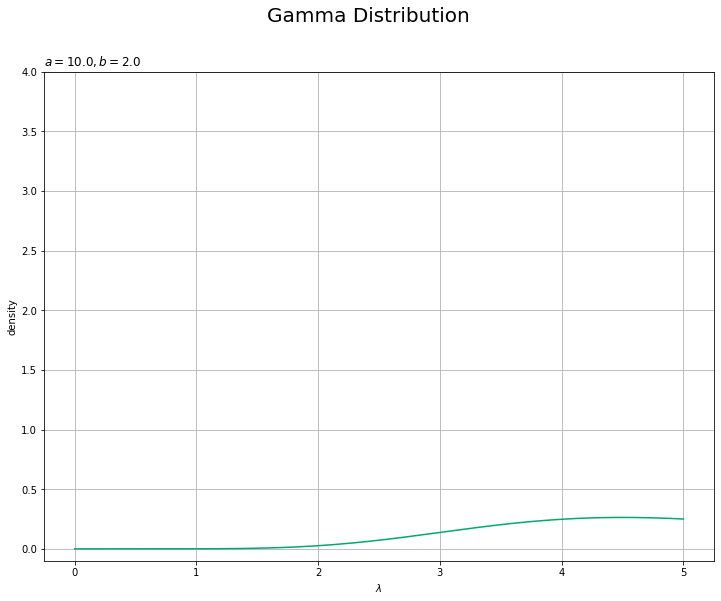

In [16]:
# パラメータとして利用する値を指定
a_vals = np.arange(start=0.1, stop=10.1, step=0.1)
b_vals = np.arange(start=0.1, stop=10.1, step=0.1)
print(len(a_vals)) # フレーム数

# 固定するパラメータを指定
a = 2.0
b = 2.0

# 作図用のlambdaの点を作成
lambda_vals = np.linspace(start=0.0, stop=5.0, num=250)

# y軸(確率密度)の最大値を設定
dens_max = 4.0

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    a = a_vals[i]
    #b = b_vals[i]
    
    # ガンマ分布を計算
    density = gamma.pdf(x=lambda_vals, a=a, scale = 1.0 / b)
    
    # ガンマ分布を作図
    plt.plot(lambda_vals, density, color='#00A968') # 折れ線グラフ
    plt.xlabel('$\lambda$') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$a=' + str(np.round(a, 1)) + ', b=' + str(np.round(b, 1)) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.1, ymax=dens_max) # y軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=len(a_vals), interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/Gamma_dens_a.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


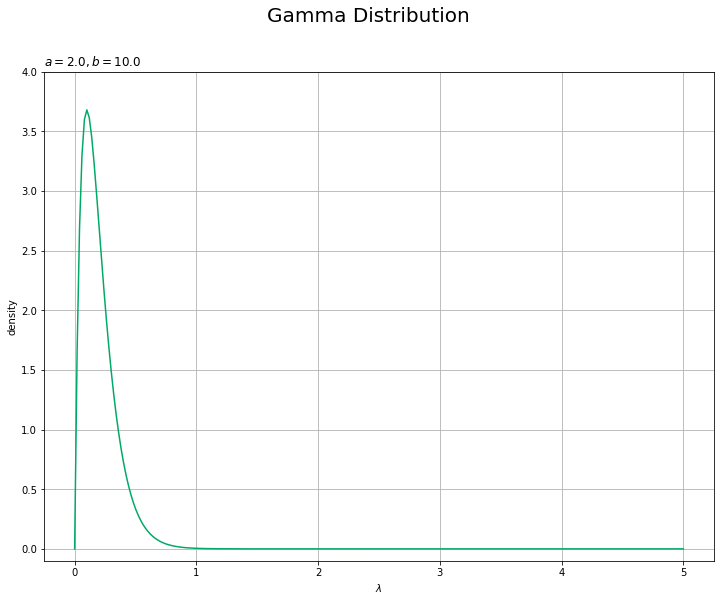

In [17]:
### 資料作成用:(再掲)

# 固定するパラメータを指定
a = 2.0
b = 2.0

# 作図用のlambdaの点を作成
lambda_vals = np.linspace(start=0.0, stop=5.0, num=250)

# y軸(確率密度)の最大値を設定
dens_max = 4.0

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i番目のパラメータを取得
    #a = a_vals[i]
    b = b_vals[i]
    
    # ガンマ分布を計算
    density = gamma.pdf(x=lambda_vals, a=a, scale = 1.0 / b)
    
    # ガンマ分布を作図
    plt.plot(lambda_vals, density, color='#00A968') # 折れ線グラフ
    plt.xlabel('$\lambda$') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.title('$a=' + str(np.round(a, 1)) + ', b=' + str(np.round(b, 1)) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.1, ymax=dens_max) # y軸の表示範囲

# gif画像を作成
anime_dens = FuncAnimation(fig, update, frames=len(a_vals), interval=100)

# gif画像を保存
anime_dens.save('../figure/Python/Gamma_dens_b.gif')

　$a, b$がとり得る値を作成して`a_vals, b_vals`とします。  
　`a_vals`または`b_vals`の値ごとに確率密度を計算して作図します。  

　平均$\mathbb{E}[\lambda] = \frac{a}{b}$、最頻値$\mathrm{mode}[\lambda] = \frac{a - 1}{b}$なので、$a$が大きくなるに従って$\lambda$が大きいほど確率密度が高くなり(山が右に移動し)ます。  
　分散$\mathbb{V}[\lambda] = \frac{a}{b^2}$なので、$b$が大きくなるに従って分布が広がり(山が低くなり)ます。  
<br>

## 乱数の生成

　ガンマ分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、ガンマ分布に従う乱数を生成します。

In [18]:
# パラメータを指定
a = 2.0
b = 2.0

# データ数(サンプルサイズ)を指定
N = 1000

# ガンマ分布に従う乱数を生成
lambda_n = np.random.gamma(shape=a, scale=1.0 / b, size=N)
print(lambda_n[:5])

[1.00800323 0.58579652 0.68562104 2.42729912 1.18735462]


　ガンマ分布の乱数は、`NumPy`ライブラリの`random`モジュールの乱数生成関数`gamma()`で生成できます。パラメータの引数`a, scale`に`a, 1.0 / b`、データ数(サンプルサイズ)の引数`size`に`N`を指定します。  

　作図に利用するため、$\lambda$の値と分布を作成しておきます。

In [19]:
# 作図用のlambdaの点を作成
lambda_vals = np.linspace(start=0.0, stop=np.max(lambda_n) + 1.0, num=250)

# ガンマ分布を計算
density = gamma.pdf(x=lambda_vals, a=a, scale=1.0 / b)

<br>

　ヒストグラムを作成します。

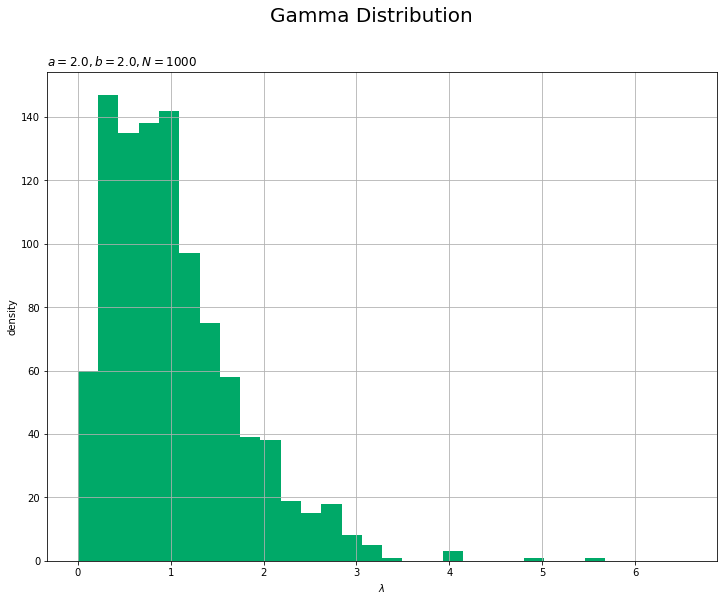

In [20]:
# サンプルのヒストグラム(頻度)を作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.hist(x=lambda_n, bins=30, range=(lambda_vals.min(), lambda_vals.max()), color='#00A968') # ヒストグラム
plt.xlabel('$\lambda$') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a) + ', b=' + str(b) + ', N=' + str(N) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.ylim(ymin=-0.01) # y軸の表示範囲
plt.show() # 描画

　`pyplot.hist()`でヒストグラムを作成します。`bins`引数に区切り数、`range`引数に区切り位置を指定します。この例では、`lambda_vals`の最小値から最大値を範囲とします。  

　サンプルの密度を分布と重ねて描画します。

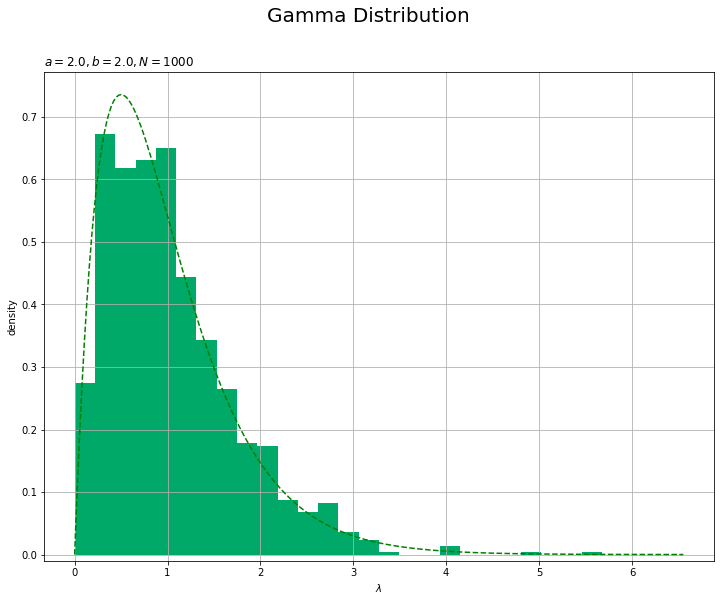

In [21]:
# サンプルのヒストグラム(密度)を作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.hist(x=lambda_n, bins=30, range=(lambda_vals.min(), lambda_vals.max()), density=True, color='#00A968') # ヒストグラム
plt.plot(lambda_vals, density, color='green', linestyle='--') # 元の分布
plt.xlabel('$\lambda$') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a) + ', b=' + str(b) + ', N=' + str(N) + '$', loc='left') # タイトル
plt.grid() # グリッド線
plt.ylim(ymin=-0.01) # y軸の表示範囲
plt.show() # 描画

　`pyplot.hist()`に`density=True`を指定すると、頻度を密度に変換して描画します。  

　データ数が十分に増えると元の分布(破線のグラフ)に形が近付きます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


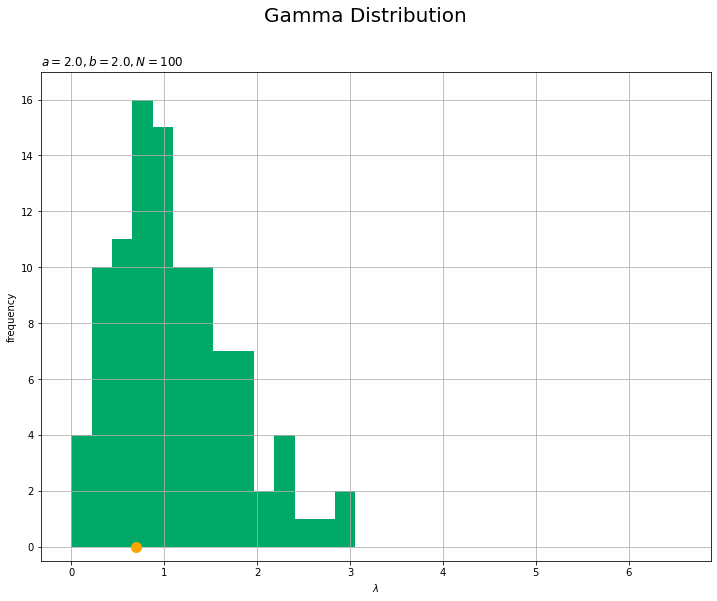

In [22]:
# フレーム数を指定
N_frame = 100

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# y軸(頻度)の最大値を設定
freq_max = np.max(
    np.histogram(a=lambda_n[:N_frame], bins=30, range=(lambda_vals.min(), lambda_vals.max()))[0], 
) + 1.0

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # サンプルのヒストグラムを作成
    plt.hist(x=lambda_n[:(n+1)], bins=30, range=(lambda_vals.min(), lambda_vals.max()), color='#00A968', zorder=1) # ヒストグラム
    plt.scatter(x=lambda_n[n], y=0.0, s=100, color='orange', zorder=2) # サンプル
    plt.xlabel('$\lambda$') # x軸ラベル
    plt.ylabel('frequency') # y軸ラベル
    plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
    plt.title('$a=' + str(a) + ', b=' + str(b) + ', N=' + str(n + 1) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.5, ymax=freq_max) # y軸の表示範囲

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Gamma_freq.gif')

<br>

　密度のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


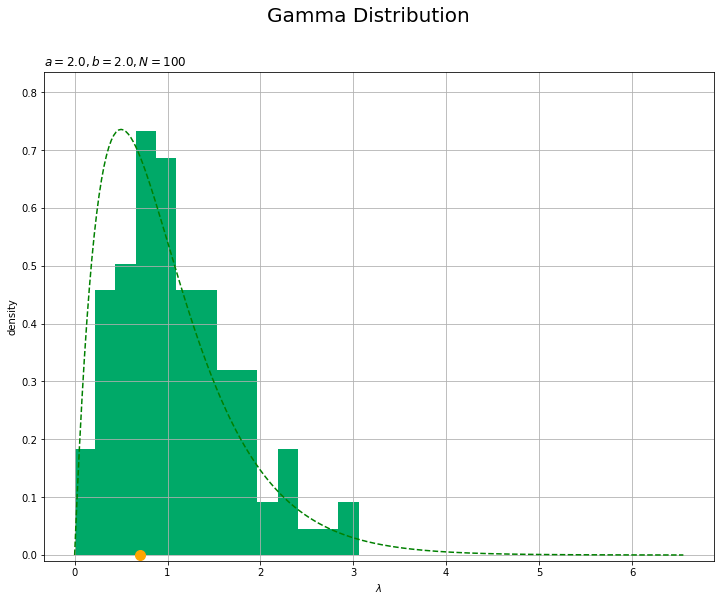

In [23]:
# フレーム数を指定
N_frame = 100

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル

# y軸(確率密度)の最大値を設定
dens_max = np.max(
    np.hstack([
        np.histogram(a=lambda_n[:N_frame], bins=30, range=(lambda_vals.min(), lambda_vals.max()), density=True)[0], 
        density
    ])
) + 0.1

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # サンプルのヒストグラムを作成
    plt.hist(x=lambda_n[:(n+1)], bins=30, range=(lambda_vals.min(), lambda_vals.max()), density=True, color='#00A968', zorder=1) # ヒストグラム
    plt.plot(lambda_vals, density, color='green', linestyle='--', zorder=2) # 元の分布
    plt.scatter(x=lambda_n[n], y=0.0, s=100, color='orange', zorder=3) # サンプル
    plt.xlabel('$\lambda$') # x軸ラベル
    plt.ylabel('density') # y軸ラベル
    plt.suptitle('Gamma Distribution', fontsize=20) # 全体のタイトル
    plt.title('$a=' + str(a) + ', b=' + str(b) + ', N=' + str(n + 1) + '$', loc='left') # タイトル
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.01, ymax=dens_max) # y軸の表示範囲

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Gamma_prop.gif')

　サンプルが増えるに従って、元の分布に近付くのを確認できます。  
<br>

## 分布の生成

　ガウス分布が共役事前分布となる1次元ガウス分布とポアソン分布のパラメータを生成して分布を作図します。  
<br>

　パラメータ$\lambda$を生成します。

In [24]:
# パラメータを指定
a = 5.0
b = 2.0

# サンプルサイズを指定
N = 10

# ガウス分布・ポアソン分布のパラメータを生成
lambda_n = np.random.gamma(shape=a, scale=1.0 / b, size=N)
print(lambda_n[:5])

[4.96242223 2.493145   2.48805143 1.88841773 2.70690889]


　ガンマ分布に従う乱数を生成して、パラメータ$\lambda$として利用します。  
<br>

### 1次元ガウス分布

　生成した$\lambda$を1次元ガウス分布の精度パラメータとして利用します。1次元ガウス分布の計算と可視化については「1次元ガウス分布の作図」を参照してください。  

　1次元ガウス分布は、平均パラメータ$\mu$、精度パラメータ$\lambda$を用いて次の式で定義されます。

$$
\mathcal{N}(x | \mu, \lambda^{-1})
    = \frac{1}{\sqrt{2 \pi \lambda^{-2}}}
      \exp \left(
          - \frac{\lambda}{2}
            (x - \mu)^2
      \right)
$$

　ここで、精度$\lambda$は分散$\sigma^2$の逆数$\lambda = \frac{1}{\sigma^2}$です。  

　まずは、目安となるように$\lambda$の期待値$\mathbb{E}[\lambda]$による分布を求めます。

In [25]:
# 平均パラメータを指定
mu = 0.0

# 精度パラメータの期待値を計算
E_lambda = a / b

# 標準偏差の期待値を計算
E_sigma = np.sqrt(1.0 / E_lambda)

# 作図用のxの点を作成
x_vals = np.linspace(start=mu - E_sigma*4.0, stop=mu + E_sigma*4.0, num=250)
print(x_vals[:5])

# 精度パラメータの期待値による1次元ガウス分布を計算
E_dens = norm.pdf(x=x_vals, loc=mu, scale=E_sigma)
print(E_dens[:5])

[-2.52982213 -2.50950227 -2.48918242 -2.46886256 -2.4485427 ]
[0.0002116  0.0002405  0.00027306 0.0003097  0.00035091]


　1次元ガウス分布の平均パラメータ$\mu$を指定します。  

　精度パラメータの期待値$\mathbb{E}[\lambda] = \frac{a}{b}$を計算して、`E_lambda`とします。精度$\lambda$の逆数$\frac{1}{\lambda}$が分散$\sigma^2$であり、分散$\sigma^2$の平方根$\sqrt{\sigma^2}$が標準偏差$\sigma$になります。  
　標準偏差の期待値$\mathbb{E}[\sigma] = \sqrt{\frac{1}{\mathbb{E}[\lambda]}}$を計算して、`E_sigma`とします。  

　$x$として利用する値を作成して`x_vals`とします。この例では、平均`mu`を中心に標準偏差の`E_sigma`の`4`倍を範囲とします。  
　`SciPy`ライブラリの`norm()`モジュールの`pdf()`メソッドで、1次元ガウス分布の確率密度を計算します。平均の引数`loc`に`mu`、標準偏差の引数`scale`に`E_sigma`を指定します。  

　$N + 1$個の1次元ガウス分布を作図します。パラメータのサンプル`lambda_vals`の値ごとに分布を計算します。

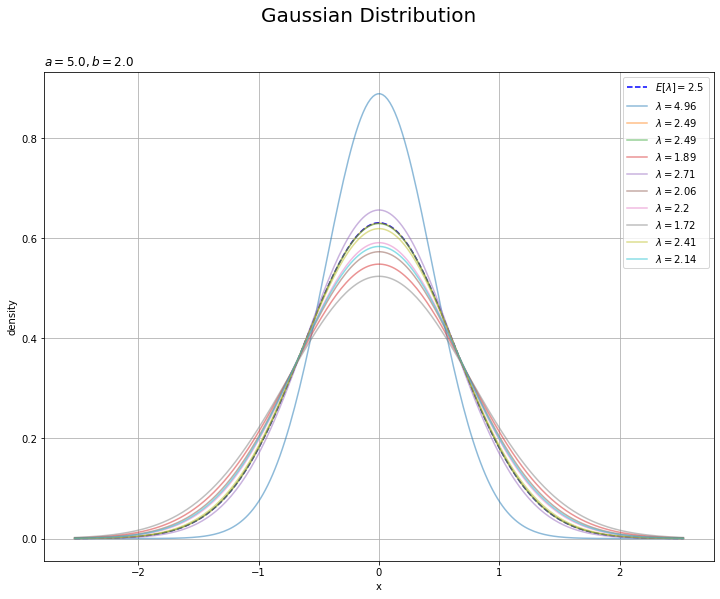

In [26]:
# サンプルによる分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.plot(x_vals, E_dens, color='blue', linestyle='--', label='$E[\lambda]=' + str(np.round(E_lambda, 2)) + '$') # 期待値による分布
for n in range(N):
    tmp_dens = norm.pdf(x=x_vals, loc=mu, scale=np.sqrt(1.0 / lambda_n[n]))
    plt.plot(x_vals, tmp_dens, alpha=0.5, label='$\lambda=' + str(np.round(lambda_n[n], 2)) + '$') # サンプルによる分布
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Gaussian Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　平均の分布(破線)を中心に分布している？  
<br>

### ポアソン分布

　続いて、生成した$\lambda$をポアソン分布のパラメータとして利用します。ポアソン分布の計算と可視化については「ポアソン分布の作図」を参照してください。  

　ポアソン分布は、パラメータ$\lambda$を用いて次の式で定義されます。

$$
\mathrm{Poi}(x | \lambda)
    = \frac{\lambda^x}{x!}
      e^{-\lambda}
$$

　まずは、目安となるように$\lambda$の期待値$\mathbb{E}[\lambda]$による分布を求めます。

In [27]:
# パラメータの期待値を計算
E_lambda = a / b

# 作図用のxの点を作成
x_vals = np.arange(np.ceil(E_lambda) * 4.0)
print(x_vals[:5])

# パラメータの期待値によるポアソン分布を計算
E_prob = poisson.pmf(k=x_vals, mu=E_lambda)
print(E_prob[:5])

[0. 1. 2. 3. 4.]
[0.082085   0.2052125  0.25651562 0.21376302 0.13360189]


　こちらも、パラメータの期待値$\mathbb{E}[\lambda] = \frac{a}{b}$を計算して、`E_lambda`とします。  

　$x$として利用する値を作成して`x_vals`とします。この例では、`0`からパラメータ`E_lambda`の最大値の`4`倍を範囲とする整数とします。整数となるように、`E_lambda`を`np.ceil()`で切り上げて利用します。  
　`SciPy`ライブラリの`poisson`モジュール`pmf()`メソッドで、ポアソン分布の確率を計算します。変数の引数`k`に`x_vals`、パラメータの引数`mu`に`E_lambda`を指定します。  

　$N + 1$個のポアソン分布を作図します。パラメータのサンプル`lambda_n`の値ごとにポアソン分布を計算します。

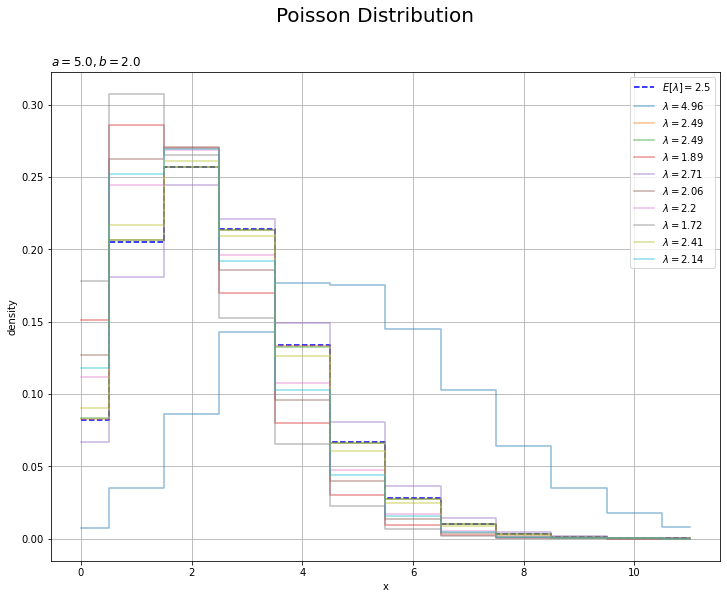

In [28]:
# サンプルによる分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.step(x=x_vals, y=E_prob, where='mid', 
         color='blue', linestyle='--', label='$E[\lambda]=' + str(np.round(E_lambda, 2)) + '$') # 期待値による分布
for n in range(N):
    tmp_prob = poisson.pmf(k=x_vals, mu=lambda_n[n])
    plt.step(x=x_vals, y=tmp_prob, where='mid', 
             alpha=0.5, label='$\lambda=' + str(np.round(lambda_n[n], 2)) + '$') # サンプルによる分布
plt.xlabel('x') # x軸ラベル
plt.ylabel('density') # y軸ラベル
plt.suptitle('Poisson Distribution', fontsize=20) # 全体のタイトル
plt.title('$a=' + str(a) + ', b=' + str(b) + '$', loc='left') # タイトル
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　複数の棒グラフを重ねると分かりにくいので、`pyplot.step()`で階段状のグラフとして描画します。  

　平均の分布(破線)を中心に分布している？  
<br>